In [2]:
import json
import getpass
import requests
import numpy as np
import geopandas as gpd
import zipfile
import io
import matplotlib.pyplot as plt
from pprint import pprint
from osgeo import gdal
from shapely.geometry import box
from pathlib import Path

# Login to NASA Earthdata

In [3]:
nasa_earthdata_api = 'https://appeears.earthdatacloud.nasa.gov/api/'

nasa_earthdata_user = getpass.getpass(prompt = 'Enter NASA Earthdata Login Username: ')      
nasa_earthdata_password = getpass.getpass(prompt = 'Enter NASA Earthdata Login Password: ') 

token_response = requests.post(f"{nasa_earthdata_api}login", auth=(nasa_earthdata_user, nasa_earthdata_password)).json()

token = token_response['token']                      
head = {'Authorization': f"Bearer {token}"}

del nasa_earthdata_user, nasa_earthdata_password

# Explore Products

In [4]:
product_response = requests.get(f"{nasa_earthdata_api}product").json()                         # request all products in the product service
print(f"AppEEARS currently supports {len(product_response)} products.") 
products = {p['ProductAndVersion']: p for p in product_response}

AppEEARS currently supports 149 products.


# Show All Products with Description Containing Keyword

In [5]:
def get_products_with_description(keyword):
    for p in {p['ProductAndVersion'] for p in product_response}:                                            
        if keyword in products[p]['Description']:
            pprint(products[p])

## Vegetation
Below is all products with a description that contains the keyword "Vegetation"

In [6]:
get_products_with_description(keyword='Vegetation')

{'Available': True,
 'DOI': '10.5067/MODIS/MYD13A2.061',
 'Deleted': False,
 'Description': 'Vegetation Indices (NDVI & EVI)',
 'DocLink': 'https://doi.org/10.5067/MODIS/MYD13A2.061',
 'Info': {},
 'Platform': 'Aqua MODIS',
 'Product': 'MYD13A2',
 'ProductAndVersion': 'MYD13A2.061',
 'RasterType': 'Tile',
 'Resolution': '1000m',
 'Source': 'LP DAAC',
 'TemporalExtentEnd': 'Present',
 'TemporalExtentStart': '2002-07-04',
 'TemporalGranularity': '16 day',
 'Version': '061'}
{'Available': True,
 'DOI': '10.5067/MODIS/MOD13Q1.061',
 'Deleted': False,
 'Description': 'Vegetation Indices (NDVI & EVI)',
 'DocLink': 'https://doi.org/10.5067/MODIS/MOD13Q1.061',
 'Info': {},
 'Platform': 'Terra MODIS',
 'Product': 'MOD13Q1',
 'ProductAndVersion': 'MOD13Q1.061',
 'RasterType': 'Tile',
 'Resolution': '250m',
 'Source': 'LP DAAC',
 'TemporalExtentEnd': 'Present',
 'TemporalExtentStart': '2000-02-18',
 'TemporalGranularity': '16 day',
 'Version': '061'}
{'Available': True,
 'DOI': '10.5067/VIIRS/VNP

## Elevation
Below is all products with a description that contains the keyword "Elevation"

In [7]:
get_products_with_description(keyword='Elevation')

{'Available': True,
 'DOI': '10.5067/MEaSUREs/SRTM/SRTMGL3_NC.003',
 'Deleted': False,
 'Description': 'Elevation (DEM)',
 'DocLink': 'https://doi.org/10.5067/MEaSUREs/SRTM/SRTMGL3_NC.003',
 'Info': {},
 'Platform': 'SRTM',
 'Product': 'SRTMGL3_NC',
 'ProductAndVersion': 'SRTMGL3_NC.003',
 'RasterType': 'Tile',
 'Resolution': '90m',
 'Source': 'LP DAAC',
 'TemporalExtentEnd': '2000-02-21',
 'TemporalExtentStart': '2000-02-11',
 'TemporalGranularity': 'Static',
 'Version': '003'}
{'Available': True,
 'DOI': '10.5067/ASTER/ASTGTM_NC.003',
 'Deleted': False,
 'Description': 'Elevation',
 'DocLink': 'https://doi.org/10.5067/ASTER/ASTGTM_NC.003',
 'Info': {},
 'Platform': 'ASTER GDEM',
 'Product': 'ASTGTM_NC',
 'ProductAndVersion': 'ASTGTM_NC.003',
 'RasterType': 'Tile',
 'Resolution': '30m',
 'Source': 'LP DAAC',
 'TemporalExtentEnd': '2000-03-01',
 'TemporalExtentStart': '2000-03-01',
 'TemporalGranularity': 'Static',
 'Version': '003'}
{'Available': True,
 'DOI': '10.5067/MEaSUREs/SRTM/S

# Weather

In [8]:
get_products_with_description(keyword='Weather')

{'Available': True,
 'DOI': '10.3334/ORNLDAAC/2129',
 'Deleted': False,
 'Description': 'Daily Surface Weather Data for North America',
 'DocLink': 'https://doi.org/10.3334/ORNLDAAC/2129',
 'Info': {},
 'Platform': 'DAYMET',
 'Product': 'DAYMET',
 'ProductAndVersion': 'DAYMET.004',
 'RasterType': 'Tile',
 'Resolution': '1000m',
 'Source': 'ORNL',
 'TemporalExtentEnd': '2023-12-31',
 'TemporalExtentStart': '1950-01-01',
 'TemporalGranularity': 'Daily',
 'Version': '004'}


# Select Products

In [9]:
selected_products = [products['MOD13Q1.061'], products['SRTMGL1_NC.003'], products['DAYMET.004']]
print("Selected products: ")
pprint(selected_products)

Selected products: 
[{'Available': True,
  'DOI': '10.5067/MODIS/MOD13Q1.061',
  'Deleted': False,
  'Description': 'Vegetation Indices (NDVI & EVI)',
  'DocLink': 'https://doi.org/10.5067/MODIS/MOD13Q1.061',
  'Info': {},
  'Platform': 'Terra MODIS',
  'Product': 'MOD13Q1',
  'ProductAndVersion': 'MOD13Q1.061',
  'RasterType': 'Tile',
  'Resolution': '250m',
  'Source': 'LP DAAC',
  'TemporalExtentEnd': 'Present',
  'TemporalExtentStart': '2000-02-18',
  'TemporalGranularity': '16 day',
  'Version': '061'},
 {'Available': True,
  'DOI': '10.5067/MEaSUREs/SRTM/SRTMGL1_NC.003',
  'Deleted': False,
  'Description': 'Elevation (DEM)',
  'DocLink': 'https://doi.org/10.5067/MEaSUREs/SRTM/SRTMGL1_NC.003',
  'Info': {},
  'Platform': 'SRTM',
  'Product': 'SRTMGL1_NC',
  'ProductAndVersion': 'SRTMGL1_NC.003',
  'RasterType': 'Tile',
  'Resolution': '30m',
  'Source': 'LP DAAC',
  'TemporalExtentEnd': '2000-02-21',
  'TemporalExtentStart': '2000-02-11',
  'TemporalGranularity': 'Static',
  'Ver

# Explore Product Layers

In [10]:
for selected_product in selected_products:
    selected_product_layers = requests.get(f"{nasa_earthdata_api}product/{selected_product['ProductAndVersion']}").json()
    print(f"{selected_product['ProductAndVersion']} Layer ")
    pprint(list(selected_product_layers.keys()))

MOD13Q1.061 Layer 
['_250m_16_days_EVI',
 '_250m_16_days_MIR_reflectance',
 '_250m_16_days_NDVI',
 '_250m_16_days_NIR_reflectance',
 '_250m_16_days_VI_Quality',
 '_250m_16_days_blue_reflectance',
 '_250m_16_days_composite_day_of_the_year',
 '_250m_16_days_pixel_reliability',
 '_250m_16_days_red_reflectance',
 '_250m_16_days_relative_azimuth_angle',
 '_250m_16_days_sun_zenith_angle',
 '_250m_16_days_view_zenith_angle']
SRTMGL1_NC.003 Layer 
['SRTMGL1_DEM']
DAYMET.004 Layer 
['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']


# Add Layers of Interest

In [11]:
layers = [
    ('MOD13Q1.061', '_250m_16_days_NDVI'),
    ('MOD13Q1.061', '_250m_16_days_EVI'),
    ('SRTMGL1_NC.003', 'SRTMGL1_DEM'),
    ('DAYMET.004', 'dayl'),
    ('DAYMET.004', 'prcp'),
    ('DAYMET.004', 'tmax'),
    ('DAYMET.004', 'tmin'),
    ('DAYMET.004', 'vp'),
]
products_layers = [{'layer': l[1], 'product': l[0]} for l in layers]
products_layers

[{'layer': '_250m_16_days_NDVI', 'product': 'MOD13Q1.061'},
 {'layer': '_250m_16_days_EVI', 'product': 'MOD13Q1.061'},
 {'layer': 'SRTMGL1_DEM', 'product': 'SRTMGL1_NC.003'},
 {'layer': 'dayl', 'product': 'DAYMET.004'},
 {'layer': 'prcp', 'product': 'DAYMET.004'},
 {'layer': 'tmax', 'product': 'DAYMET.004'},
 {'layer': 'tmin', 'product': 'DAYMET.004'},
 {'layer': 'vp', 'product': 'DAYMET.004'}]

# Explore Available Projections

In [12]:
projections = requests.get(f"{nasa_earthdata_api}spatial/proj").json()
pprint(projections)
projs = {}                                  
for p in projections: 
    projs[p['Name']] = p 
pprint(list(projs.keys()))

[{'Available': True,
  'Datum': '',
  'Description': '',
  'EPSG': '',
  'GridMapping': '',
  'LongName': 'Native Projection',
  'Name': 'native',
  'Platforms': '',
  'Proj4': '',
  'Units': ''},
 {'Available': True,
  'Datum': 'wgs84',
  'Description': '',
  'EPSG': 4326.0,
  'GridMapping': 'latitude_longitude',
  'LongName': 'Geographic',
  'Name': 'geographic',
  'Platforms': "['SRTM', 'ECOSTRESS', 'SSEBop ET', 'GPW', 'ASTER GDEM', "
               "'NASADEM', 'MEaSUREs LSTE', 'EMIT']",
  'Proj4': '+proj=longlat +datum=WGS84 +no_defs=True',
  'Units': 'degrees'},
 {'Available': True,
  'Datum': '',
  'Description': '',
  'EPSG': '',
  'GridMapping': 'sinusoidal',
  'LongName': 'MODIS Sinusoidal',
  'Name': 'sinu_modis',
  'Platforms': "['Combined MODIS', 'Terra MODIS', 'Aqua MODIS', 'Suomi NPP "
               "VIIRS', 'NOAA-20 VIIRS', 'Global WELD']",
  'Proj4': '+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007.181 +units=m '
           '+no_defs=True',
  'Units': 'meters'},
 {'Availa

# Define Area of Interest

In [13]:
canada_boundary_shapefile_path = 'data/canada_boundary/lpr_000b16a_e.shp'

canada_boundary = gpd.read_file(canada_boundary_shapefile_path)
canada_boundary

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.46, 817623..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.44, 637874..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.64 ..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


Number of coordinates : 3,390,960


Text(0.5, 1.0, 'Canada Boundary (EPSG:3347)')

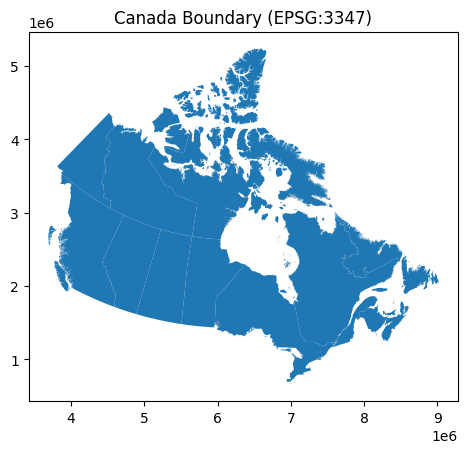

In [14]:
print(f"Number of coordinates : {canada_boundary.count_coordinates().sum():,}")
ax = canada_boundary.plot()
ax.set_title(f"Canada Boundary (EPSG:{canada_boundary.crs.to_epsg()})")

Number of coordinates : 2,093,717


Text(0.5, 1.0, 'Canada Boundary (Without Nunavut) (EPSG:3347)')

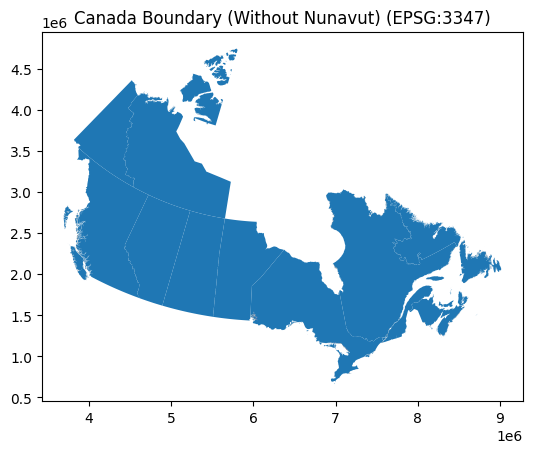

In [15]:
canada_boundary = canada_boundary[canada_boundary['PRUID'] != '62']
print(f"Number of coordinates : {canada_boundary.count_coordinates().sum():,}")
ax = canada_boundary.plot()
ax.set_title(f"Canada Boundary (Without Nunavut) (EPSG:{canada_boundary.crs.to_epsg()})")

# Grid Area of Interest

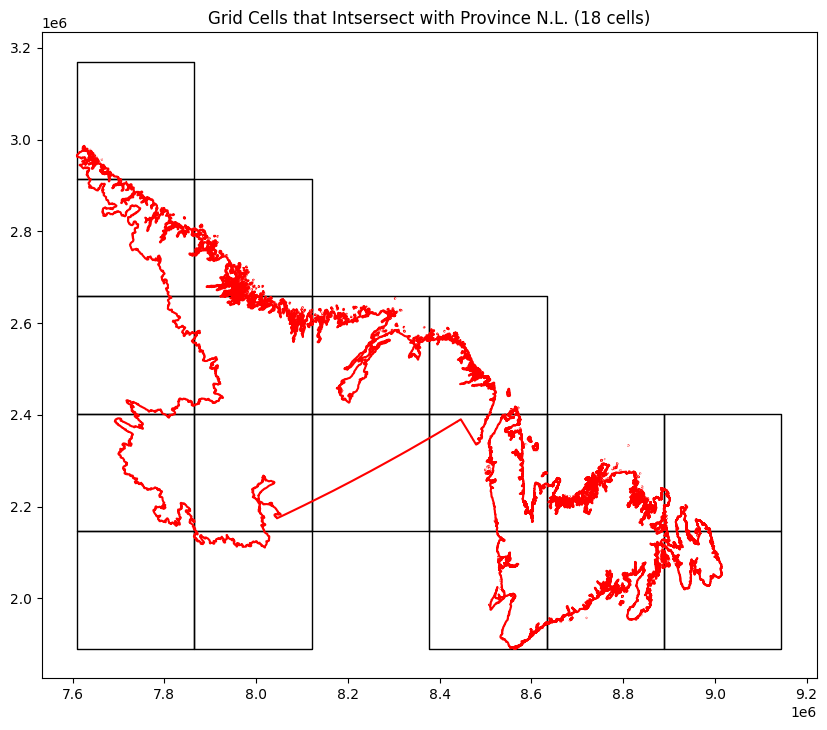

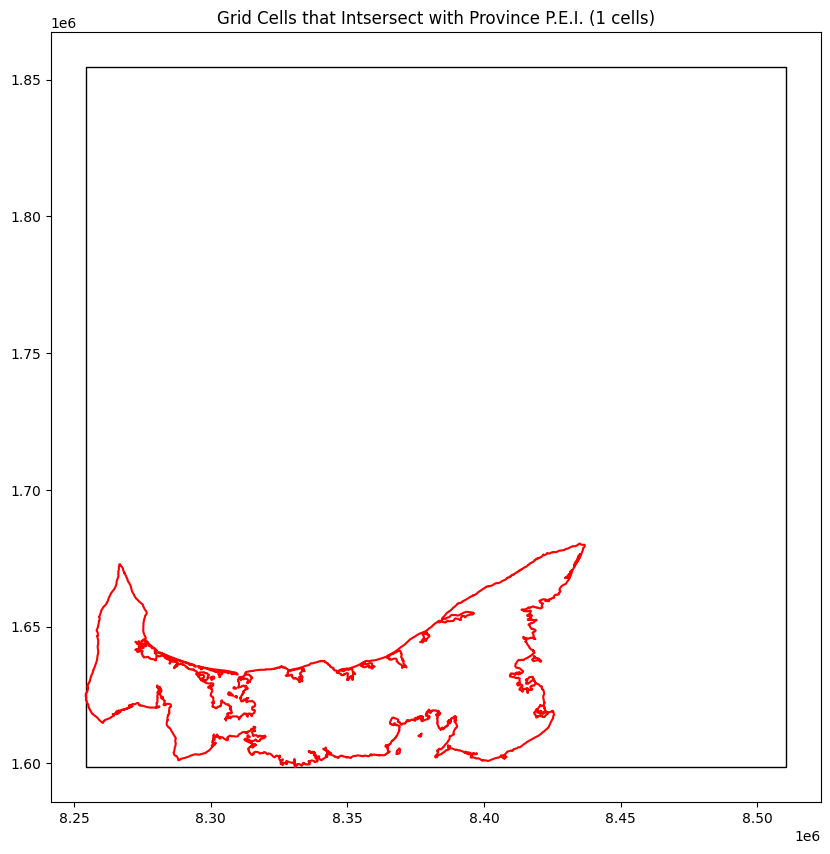

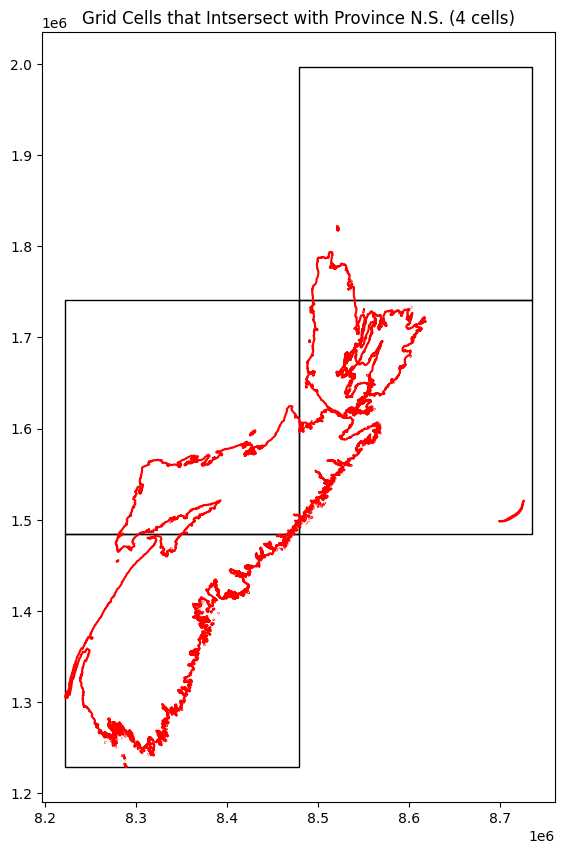

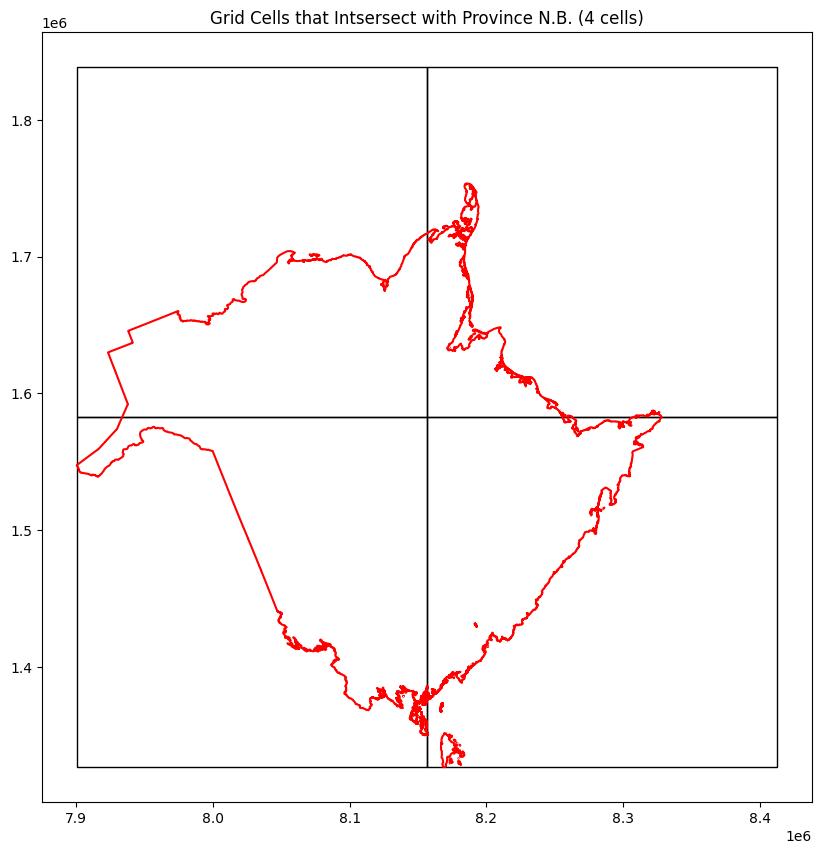

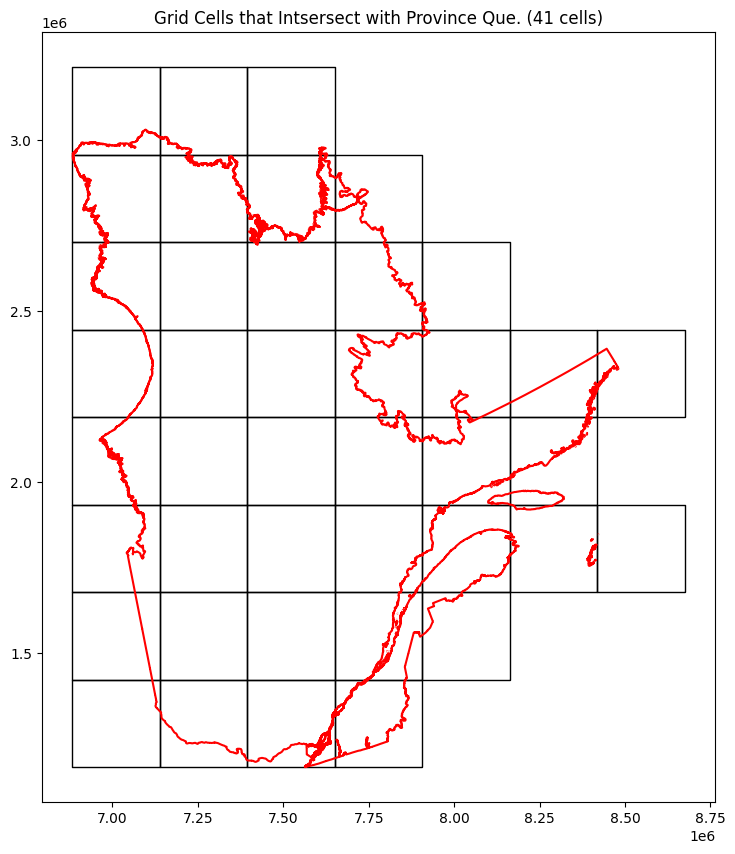

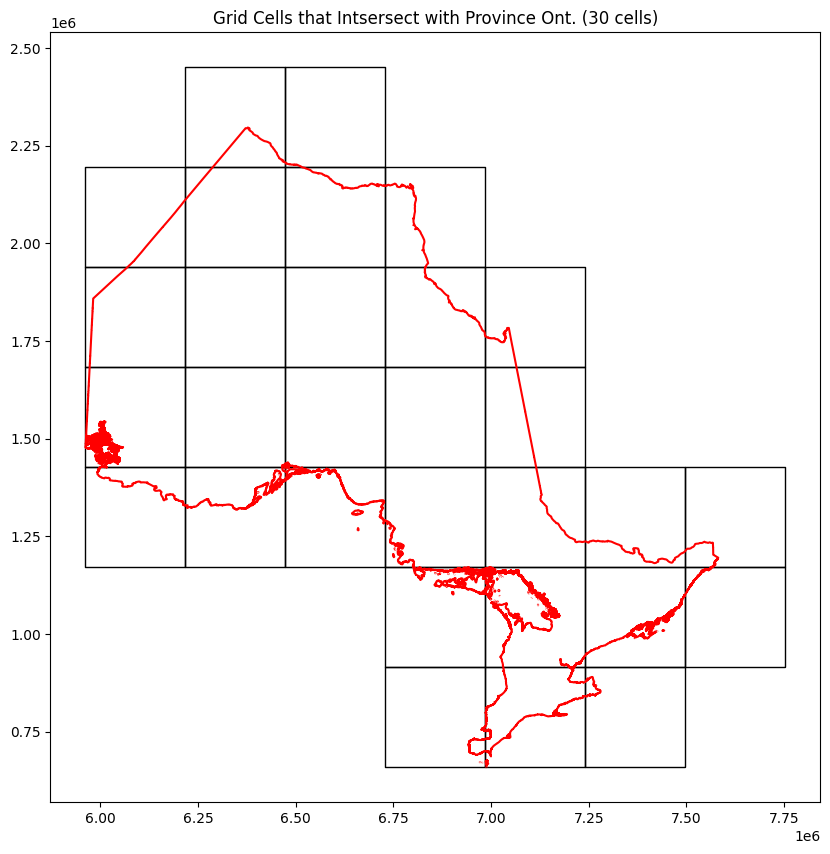

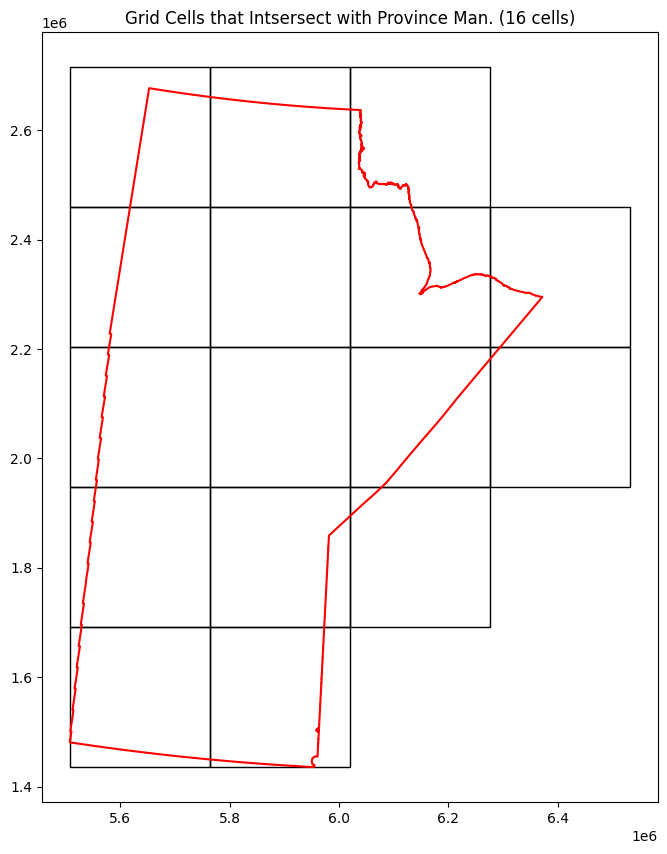

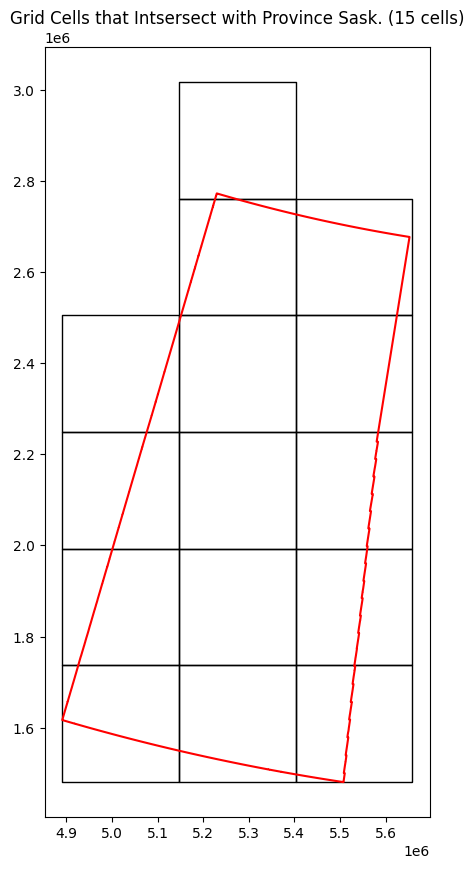

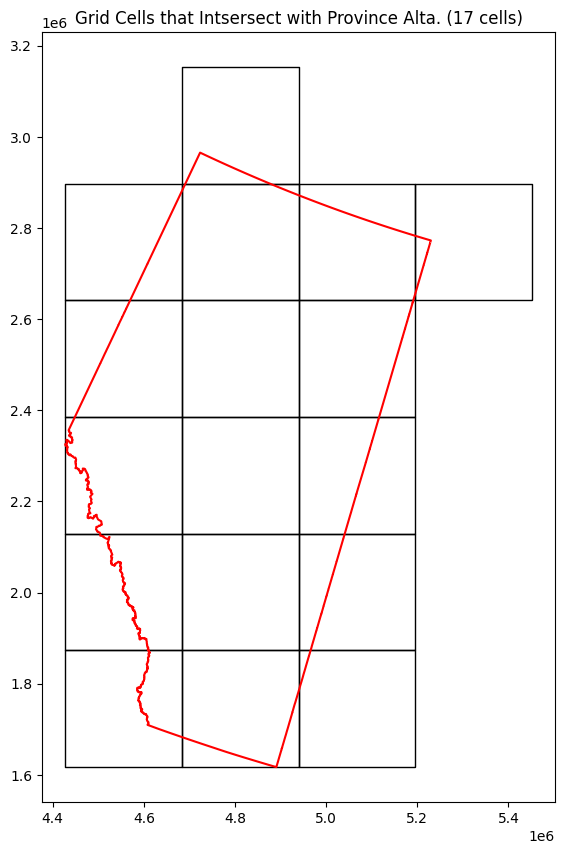

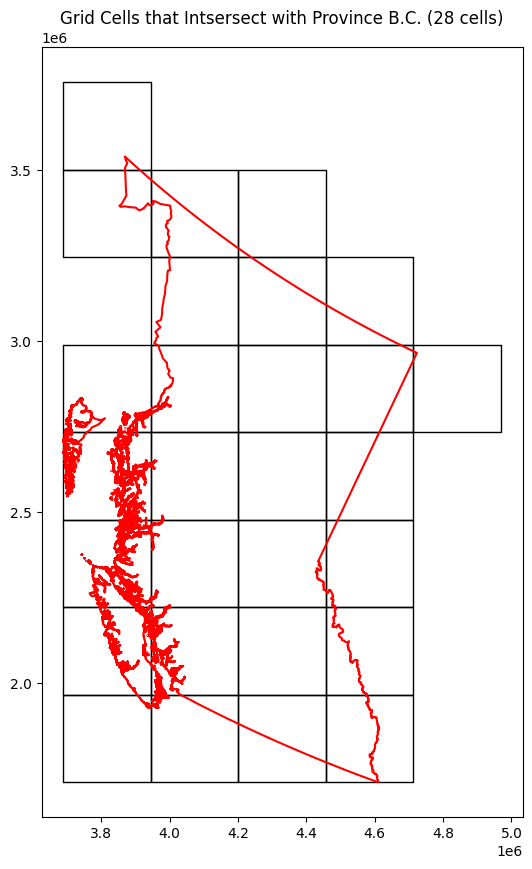

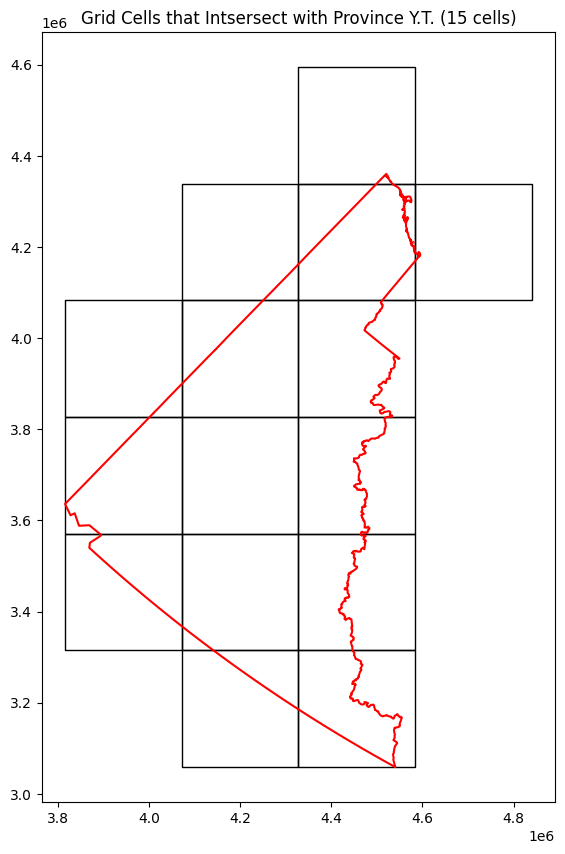

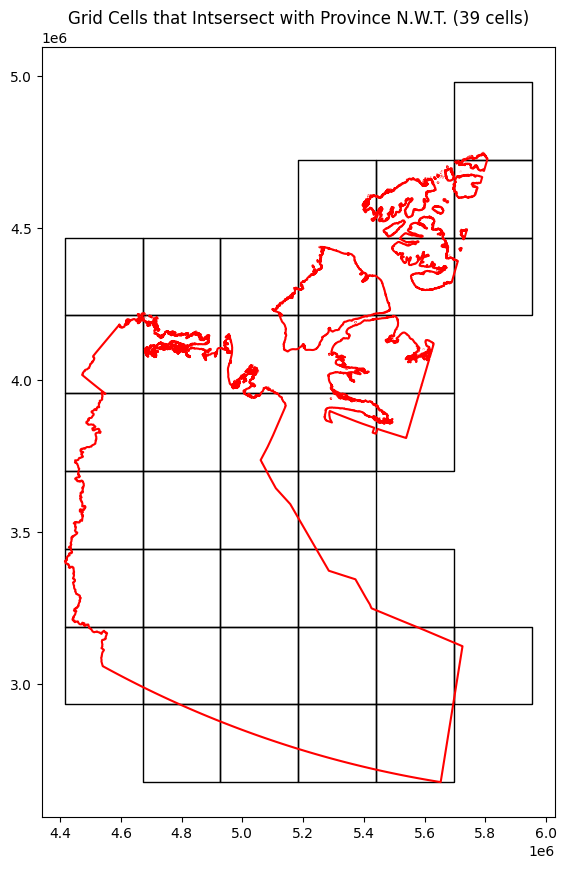

Total number of coordinates (all provinces): 1,140
Total number of cells (all provinces): 228


In [71]:
provinces_grid_cells = {}
for province_pruid in canada_boundary['PRUID']:
    province_boundary = canada_boundary[canada_boundary['PRUID'] == province_pruid]
    
    minx, miny, maxx, maxy = province_boundary.total_bounds

    grid_size_in_meters = 256_000.0 # 500m resolution * 512 pixels = 256 000 meters per side

    x_coords = np.arange(minx, maxx, grid_size_in_meters)
    y_coords = np.arange(miny, maxy, grid_size_in_meters)
    grid_cells = [box(x, y, x + grid_size_in_meters, y + grid_size_in_meters) for x in x_coords for y in y_coords]

    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=province_boundary.crs)
    grid_within_boundary = grid[grid.intersects(province_boundary.union_all())]
    
    provinces_grid_cells[province_pruid] = grid_within_boundary

    ax = grid_within_boundary.plot(edgecolor='black', facecolor='none', figsize=(10, 10))
    province_boundary.boundary.plot(ax=ax, edgecolor='red')
    plt.title(f"Grid Cells that Intsersect with Province {province_boundary['PREABBR'].values[0]} ({len(grid_within_boundary)} cells)")
    plt.show()

print(f"Total number of coordinates (all provinces): {sum([grid_cells.count_coordinates().sum() for grid_cells in provinces_grid_cells.values()]):,}")
print(f"Total number of cells (all provinces): {sum([len(grid_cells) for grid_cells in provinces_grid_cells.values()]):,}")

# Reproject Area of Interest

Number of coordinates : 205
Number of grid cells : 41


Text(0.5, 1.0, 'Reprojected Quebec Grid Cells (EPSG:4326)')

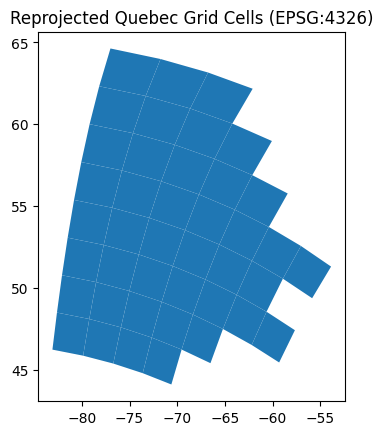

In [65]:
target_epsg = int(projs['geographic']['EPSG'])
qc_grid_reprojected = provinces_grid_cells['24'].to_crs(epsg=target_epsg)
print(f"Number of coordinates : {qc_grid_reprojected.count_coordinates().sum():,}")
print(f"Number of grid cells : {len(qc_grid_reprojected):,}")
ax = qc_grid_reprojected.plot()
ax.set_title(f"Reprojected Quebec Grid Cells (EPSG:{qc_grid_reprojected.crs.to_epsg()})")

# Submit Task

In [68]:
geo_area_json = json.loads(qc_grid_reprojected.to_json())
task_name = input('Enter a Task Name: ')
task_type = "area" # 'area', 'point'
output_format = 'netcdf4' # 'netcdf4', 'geotiff'
output_projection = projs['geographic']['Name']
startDate = "11-30-2022" # MM-DD-YYYY
endDate = "12-31-2022" # MM-DD-YYYY
recurring = False    
task = {
    "task_type": task_type,
    "task_name": task_name,
    "params": {
        "dates": [
            {
                "startDate": startDate,
                "endDate": endDate,
                "recurring": recurring
            }
        ],
        "layers": products_layers,
        'output': {
            'format': {
                'type': output_format
            },
            'projection': output_projection
        },
        "geo": geo_area_json,
    }
}

task_response = requests.post(f"{nasa_earthdata_api}task", json=task, headers=head)
pprint(f"Status Code: {task_response.status_code} {task_response.reason}")
task_response_json = task_response.json()
pprint(f"Task Response JSON: {task_response_json}")

'Status Code: 400 BAD REQUEST'
("Task Response JSON: {'message': 'The total number of files this request will "
 'generate exceeds the maximum size allowed by 678.1%. Please reduce the '
 "request and resubmit.'}")


# Download Data
You must wait until the data is processed.  
You should receive an email when it is done or you can check via https://appeears.earthdatacloud.nasa.gov/explore

In [22]:
task_id = '1fb98949-ef1a-40f7-8d5e-82e2324d084f' # or task_response_json['task_id']
bundle = requests.get(f"{nasa_earthdata_api}bundle/{task_id}", headers=head).json()
bundle 

{'files': [{'sha256': '2e48f1c83dc81c90c6089795f7e0073e15086f042a8728351a41764499dc4f58',
   'file_id': '6c80f289-3094-4ef5-90ed-46abb98761b5',
   'file_name': 'DAYMET.004_1km_aid0001.nc',
   'file_size': 3276442,
   'file_type': 'nc',
   's3_url': 's3://appeears-output/1fb98949-ef1a-40f7-8d5e-82e2324d084f/DAYMET.004_1km_aid0001.nc'},
  {'sha256': '42b72a8673183a6a2c491c142b5c2256f57dfbbe8448ae0835cc6c7ac0a1576e',
   'file_id': '031d0ca1-d06a-458c-b0a4-1469d53c65f3',
   'file_name': 'MOD13Q1.061_250m_aid0001.nc',
   'file_size': 1702564,
   'file_type': 'nc',
   's3_url': 's3://appeears-output/1fb98949-ef1a-40f7-8d5e-82e2324d084f/MOD13Q1.061_250m_aid0001.nc'},
  {'sha256': 'f4f49944ed4edeb4cc7421cd1dcc9086f248b6a9bb7202707f8fa57db24e8f6d',
   'file_id': '05162c8f-b4a0-48e1-948e-702cc18a5eae',
   'file_name': 'SRTMGL1_NC.003_30m_aid0001.nc',
   'file_size': 5943445,
   'file_type': 'nc',
   's3_url': 's3://appeears-output/1fb98949-ef1a-40f7-8d5e-82e2324d084f/SRTMGL1_NC.003_30m_aid0001.n

In [23]:
files = {}                                                      
for f in bundle['files']: 
    files[f['file_id']] = f['file_name']  
files

{'6c80f289-3094-4ef5-90ed-46abb98761b5': 'DAYMET.004_1km_aid0001.nc',
 '031d0ca1-d06a-458c-b0a4-1469d53c65f3': 'MOD13Q1.061_250m_aid0001.nc',
 '05162c8f-b4a0-48e1-948e-702cc18a5eae': 'SRTMGL1_NC.003_30m_aid0001.nc',
 '8d345feb-d459-44ad-9605-28aa461739a5': 'SRTMGL1_NUMNC.003_30m_aid0001.nc',
 '5b4d64d2-4d54-4395-a79c-f9f1583179f1': 'DAYMET.004_1km_aid0002.nc',
 'f93a3fa1-0d28-4394-aff2-45a77737ca4c': 'MOD13Q1.061_250m_aid0002.nc',
 '70d82ab9-8cdb-4748-bcc1-dd07259f8972': 'SRTMGL1_NC.003_30m_aid0002.nc',
 'c2be78c2-60ca-4036-bb42-644acd2b78e6': 'SRTMGL1_NUMNC.003_30m_aid0002.nc',
 'e838bc32-ba5b-4dcc-ba35-32c617d6e39b': 'DAYMET.004_1km_aid0003.nc',
 '9dec91cb-6e3a-415c-8618-d31d9ed14f0f': 'MOD13Q1.061_250m_aid0003.nc',
 'bbcec2d0-d175-47e7-a8a9-92c01fe34660': 'SRTMGL1_NC.003_30m_aid0003.nc',
 'a5b9be66-b7bc-4a45-8662-05b01a8eee97': 'SRTMGL1_NUMNC.003_30m_aid0003.nc',
 '147c3c13-3e45-4eaa-97c9-b1bc39d2b10d': 'DAYMET.004_1km_aid0004.nc',
 '662fd1eb-f9f5-44d8-a482-ba405041106c': 'MOD13Q1.0

In [24]:
features_dir = Path('data/features/')

i = 0
for f in files:
    if i == 10:
        break
    i += 1
    dl = requests.get(f"{nasa_earthdata_api}bundle/{task_id}/{f}", headers=head, stream=True, allow_redirects = 'True')                                # Get a stream to the bundle file
    if files[f].endswith('.tif'):
        filename = files[f].split('/')[1]
    else:
        filename = files[f] 
    with open(features_dir / Path(filename), 'wb') as f:                                                                  
        for data in dl.iter_content(chunk_size=8192): 
            f.write(data) 
print(f"Downloaded files can be found at: {features_dir}")

Downloaded files can be found at: data/features


# Preview Features

In [27]:
len(features_ds.GetSubDatasets())

5

Band dayl: Type=Float32, Min=65297.83984375, Max=66461.21875, Mean=65862.74019124985, StdDev=348.2410470542896
Band Projection : GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]



TypeError: Invalid shape (125, 125, 32) for image data

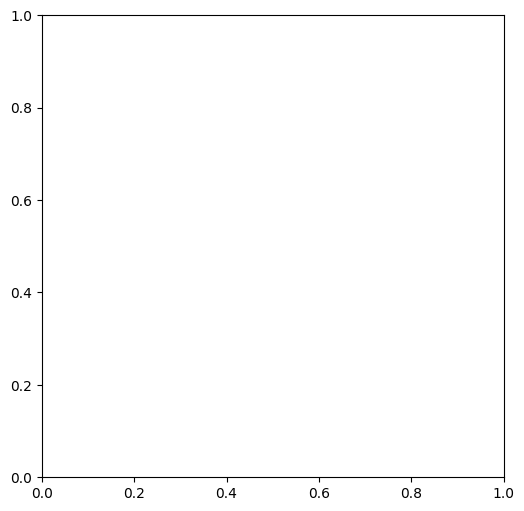

In [25]:
features_ds = gdal.Open(str((features_dir / 'DAYMET.004_1km_aid0001.nc').resolve()))
features_proj = features_ds.GetProjection()

for subdataset in features_ds.GetSubDatasets():
    band_ds = gdal.Open(subdataset[0])
    band = band_ds.GetRasterBand(1)
    band_type = gdal.GetDataTypeName(band.DataType)
    band_min, band_max, band_mean, band_stddev = band.GetStatistics(True, True)
    band_desc = band_ds.GetDescription().split(':')[-1]
    print(f"Band {band_desc}: Type={band_type}, Min={band_min}, Max={band_max}, Mean={band_mean}, StdDev={band_stddev}")
    print(f"Band Projection : {band_ds.GetProjection()}")
    print("")
    

    band_data = band_ds.ReadAsArray()

    plt.figure(figsize=(8, 6))
    plt.imshow(band_data.transpose((1, 2, 0)), cmap='RdYlGn')
    plt.colorbar(label=band_desc)
    plt.title(band_desc)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

# Download Target

In [3]:
target_dir = Path('data/target/')

In [69]:
nbac_response = requests.get("https://cwfis.cfs.nrcan.gc.ca/downloads/nbac/nbac_1972_2023_20240530_shp.zip")
zipfile.ZipFile(io.BytesIO(nbac_response.content)).extractall(target_dir)

In [4]:
target_shp = list(target_dir.glob('*.shp'))[0]
target_shp

PosixPath('data/target/nbac_1972_2023_20240530.shp')

# Preview Target

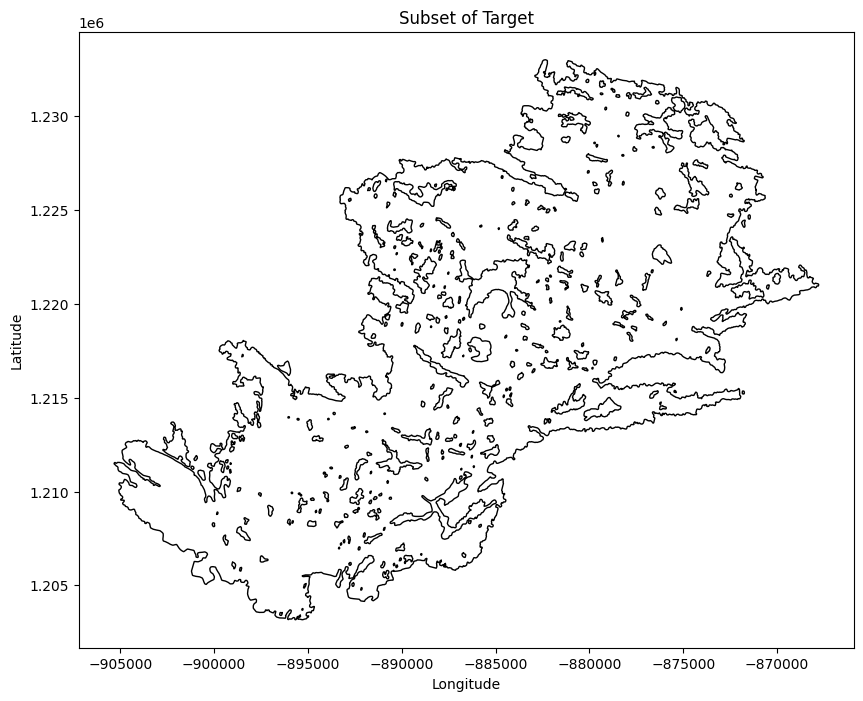

In [21]:
gdf = gpd.read_file(target_shp, rows=1)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='k', facecolor='none')
plt.title('Subset of Target')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reproject Target

In [5]:
reprojected_target_shp = Path(target_shp.parent, f"{target_shp.stem}_reprojected.shp")

In [ ]:
gdal.VectorTranslate(
    str(reprojected_target_shp.resolve()), 
    str(target_shp.resolve()), 
    dstSRS='EPSG:4326',
    reproject=True
)

# Preview Target

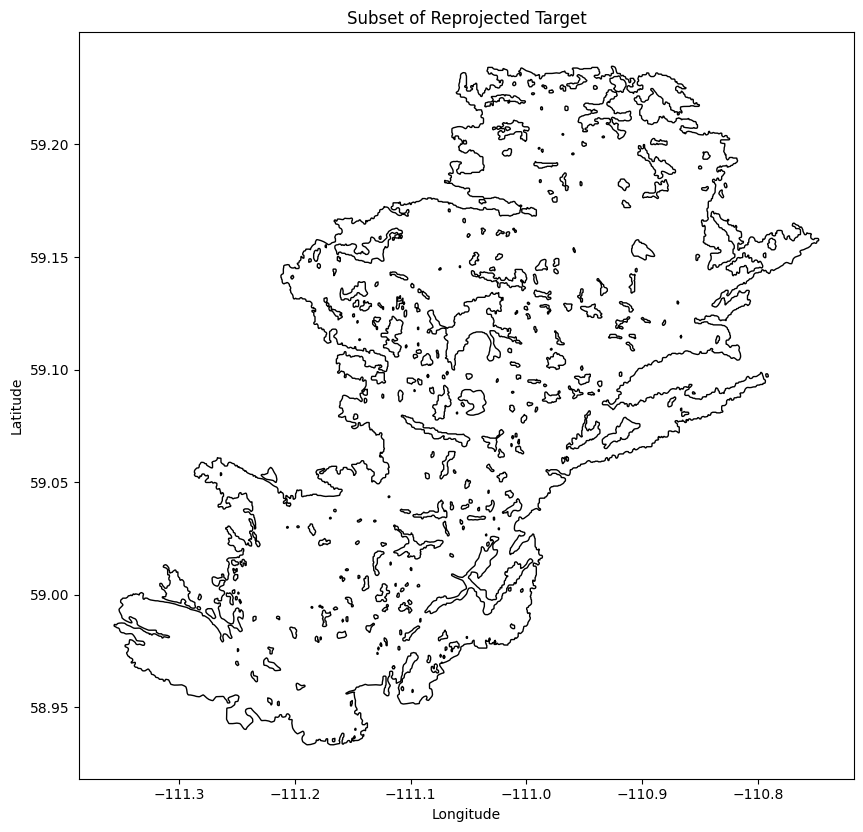

In [22]:
gdf = gpd.read_file(reprojected_target_shp, rows=1)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='k', facecolor='none')
plt.title('Subset of Reprojected Target')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()